In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append('../code')
from functions import load_v01_vs_msft
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_all = load_v01_vs_msft()

/home/nmd/Projects/mlup/eubucco-analysis/stock-analysis/../code/functions.py:32: DtypeWarning: Columns (60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df_msft = pd.read_csv(f'../data/overview-msft/{country}_overview.csv')


In [14]:
df_all['country'] = df_all.id.str.split('.').apply(lambda x: x[0] if len(x) > 1 else None)

In [21]:
df_plot = df_all.groupby('country')['a_tot_msft','a_tot_v01'].sum()
df_plot

/tmp/ipykernel_7419/998200264.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_plot = df_all.groupby('country')['a_tot_msft','a_tot_v01'].sum()


a_tot_msft     a_tot_v01
country                            
AUT      8.871660e+08  8.672717e+08
BEL      1.029752e+09  1.096373e+09
BGR      5.201483e+08  1.451302e+08
CHE      4.791412e+08  5.063953e+08
CYP      9.058255e+07  7.441705e+07
CZE      6.440366e+08  6.733762e+08
DEU      6.723726e+09  6.108344e+09
DNK      6.645659e+08  7.385338e+08
ESP      1.382051e+09  2.979510e+09
EST      7.998721e+07  1.328993e+08
FIN      5.812202e+08  6.911459e+08
FRA      5.712136e+09  5.851129e+09
GRC      8.991063e+08  1.874208e+08
HRV      3.622770e+08  1.475904e+08
HUN      8.056403e+08  3.373329e+08
IRL      3.583905e+08  2.432820e+08
ITA      4.642410e+09  3.668104e+09
LTU      2.700477e+08  2.904007e+08
LUX      4.619837e+07  4.314373e+07
LVA      1.483839e+08  1.127592e+08
MLT      2.921660e+07  3.259935e+07
NLD      8.921328e+08  1.202665e+09
POL      2.647980e+09  2.099046e+09
PRT      1.036640e+09  3.257433e+08
ROU      1.463373e+09  3.239297e+08
SVK      4.071978e+08  4.280266e+08
SVN      1.875861e+08  1.826173e+08
SWE      8.219628e+08  5.684738e+08

In [30]:
df_plot = df_plot.sort_values(by='a_tot_v01', ascending=False)
df_plot

a_tot_msft     a_tot_v01
country                            
DEU      6.723726e+09  6.108344e+09
FRA      5.712136e+09  5.851129e+09
ITA      4.642410e+09  3.668104e+09
ESP      1.382051e+09  2.979510e+09
POL      2.647980e+09  2.099046e+09
NLD      8.921328e+08  1.202665e+09
BEL      1.029752e+09  1.096373e+09
AUT      8.871660e+08  8.672717e+08
DNK      6.645659e+08  7.385338e+08
FIN      5.812202e+08  6.911459e+08
CZE      6.440366e+08  6.733762e+08
SWE      8.219628e+08  5.684738e+08
CHE      4.791412e+08  5.063953e+08
SVK      4.071978e+08  4.280266e+08
HUN      8.056403e+08  3.373329e+08
PRT      1.036640e+09  3.257433e+08
ROU      1.463373e+09  3.239297e+08
LTU      2.700477e+08  2.904007e+08
IRL      3.583905e+08  2.432820e+08
GRC      8.991063e+08  1.874208e+08
SVN      1.875861e+08  1.826173e+08
HRV      3.622770e+08  1.475904e+08
BGR      5.201483e+08  1.451302e+08
EST      7.998721e+07  1.328993e+08
LVA      1.483839e+08  1.127592e+08
CYP      9.058255e+07  7.441705e+07
LUX      4.619837e+07  4.314373e+07
MLT      2.921660e+07  3.259935e+07

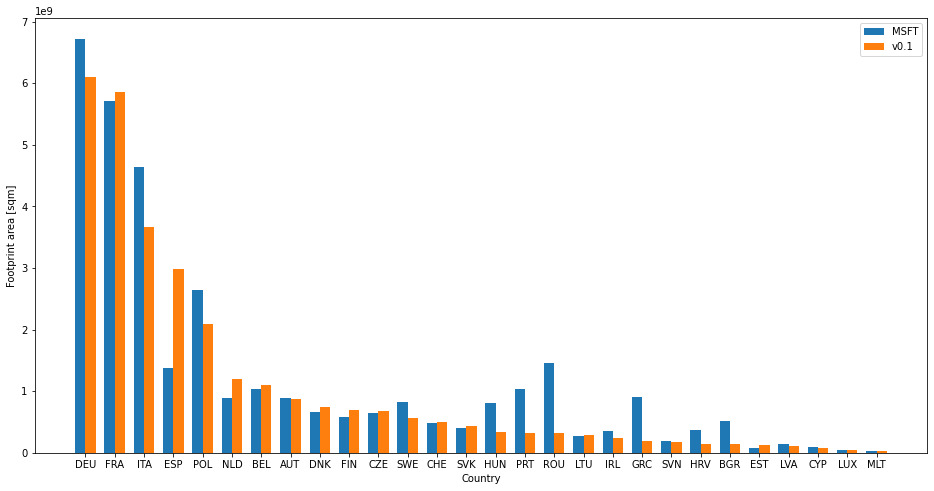

In [32]:
# # Example DataFrame
# data = {'Population': [300, 200, 150, 175, 220],
#         'GDP': [280, 190, 160, 180, 210]}
# countries = ['USA', 'Canada', 'Germany', 'France', 'Japan']

# df = pd.DataFrame(data, index=countries)

df_plot = df_plot.sort_values(by='a_tot_v01', ascending=False)

# Extract the values and index
x = np.arange(len(df_plot.index))  # the label locations
values_1 = df_plot.a_tot_msft   # First value (e.g., Population)
values_2 = df_plot.a_tot_v01          # Second value (e.g., GDP)

# Bar width
width = 0.35  

# Create the plot
fig, ax = plt.subplots(figsize=(16,8))

# Plot the bars for Population
bar1 = ax.bar(x - width/2, values_1, width, label='MSFT')

# Plot the bars for GDP
bar2 = ax.bar(x + width/2, values_2, width, label='v0.1')

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Footprint area [sqm]')

ax.set_xticks(x)
ax.set_xticklabels(df_plot.index)  # Set tick labels as country names from the index
ax.legend()

# Show the plot
plt.show()


## heights

In [34]:
df = gpd.read_file('../data/region_boundaries.gpkg')

/home/nmd/anaconda3/envs/mlup22/lib/python3.10/site-packages/pyogrio/geopandas.py:261: UserWarning: More than one layer found in 'region_boundaries.gpkg': 'region_boundaries2' (default), 'region_boundaries'. Specify layer parameter to avoid this warning.
  result = read_func(


In [35]:
df_all.columns

Index(['id', 'region_msft', 'city_msft', 'n_files_msft', 'bldgs_n_tot_msft',
       'a_tot_msft', 'a_mean_msft', 'a_med_msft', 'a_max_msft', 'a_min_msft',
       ...
       'type_n_res_v01', 'type_n_non_res_v01', 'type_p_res_v01',
       'type_p_non_res_v01', 'extra_attribs_v01', 'const_bldgs_file_v01',
       'const_id_files_v01', 'n_bldg_buffer_v01', 'unnamed_0_bits_v01',
       'country'],
      dtype='object', length=130)

In [37]:
df_all['height_p_e_msft'] = (df_all['height_n_msft'] -  df_all['height_n_inf_0_msft'] - df_all['height_n_0_2_msft'])


In [38]:
df_all['height_p_e_v01'] = (df_all['height_n_v01'] -  df_all['height_n_inf_0_v01'] - df_all['height_n_0_2_v01'])


In [48]:
a =  pd.DataFrame(df_all.groupby('region_msft')['height_p_e_msft'].sum()/df_all.groupby('region_msft')['bldgs_n_tot_msft'].sum())
b = pd.DataFrame(df_all.groupby('region_msft')['height_p_e_v01'].sum()/df_all.groupby('region_msft')['bldgs_n_tot_v01'].sum())
df_h = pd.merge(a,b,left_index=True,right_index=True)

In [52]:
df_h.columns = ['MSFT','v01']

In [55]:
df = pd.merge(df,df_h,left_on='NAME_1',right_index=True)

In [59]:
df.explore(column='v01')

In [57]:
df[df.MSFT>0].explore(column='MSFT')

In [60]:
df[df.MSFT>df.v01].explore(column='MSFT')